### Step 1: Import Libraries and Load Dataset

This block imports the necessary libraries for data handling, machine learning, and neural network building.

- `scikit-learn` provides the breast cancer dataset.
- `tensorflow.keras` is used to build and train the neural network.
- `matplotlib` is for plotting results.

Loading the dataset using `load_breast_cancer()` gives easy access to a well-known binary classification problem about breast cancer detection.

In [5]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Step 2: Data Preprocessing (Scaling and Splitting)

- We apply **feature scaling** using `StandardScaler` so that all features have zero mean and unit variance. This ensures faster and more stable training of the neural network.
- We split the dataset into training and testing sets with an 80-20 split using `train_test_split`. This allows us to train the model on one part of the data and evaluate its performance on unseen data.

In [6]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Step 3: Build Feedforward Neural Network

- The model is built using `Sequential`, a simple stack of layers.
- Two hidden layers with ReLU activation add non-linearity to the model, enabling it to learn complex patterns.
- The output layer uses a **Sigmoid** activation function, appropriate for a **binary classification** task by outputting probabilities between 0 and 1.

In [7]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer with shape
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Step 4: Compile and Train the Model

- The model is compiled with the `adam` optimizer, which adapts the learning rate to improve training speed and stability.
- We use the **binary cross-entropy** loss function, suitable for measuring error in binary classification.
- The model is trained for 30 epochs with a small batch size, and we keep aside 10% of training data for validation to monitor overfitting during training.

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7066 - loss: 0.5539 - val_accuracy: 0.8261 - val_loss: 0.3968
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8851 - loss: 0.3610 - val_accuracy: 0.8261 - val_loss: 0.2915
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9120 - loss: 0.2667 - val_accuracy: 0.8913 - val_loss: 0.2196
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9315 - loss: 0.2049 - val_accuracy: 0.9348 - val_loss: 0.1682
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9487 - loss: 0.1615 - val_accuracy: 0.9348 - val_loss: 0.1411
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9584 - loss: 0.1328 - val_accuracy: 0.9565 - val_loss: 0.1230
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9658 - loss: 0.1132 - val_accuracy: 0.9565 - val_loss: 0.1104
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9707 - loss: 0.0984 - val_accuracy: 0.9565 - val_loss

### Step 5: Model Evaluation

- After training, predictions are generated on the test data.
- We calculate **accuracy**, **precision**, **recall**, and **F1-score** to get a comprehensive understanding of the model’s performance:
  - Accuracy: Overall correctness
  - Precision: How many positive predictions were correct
  - Recall: How many actual positives were detected
  - F1-Score: Harmonic mean of precision and recall
- These metrics help evaluate beyond simple accuracy, especially important in imbalanced datasets.

In [9]:
# Get predictions (0/1 class) on the test set
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy: 0.9824561403508771
Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1-score: 0.9859154929577465
Confusion Matrix:
 [[42  1]
 [ 1 70]]


### Step 6: Confusion Matrix Plotting

- The confusion matrix summarizes true positive, false positive, true negative, and false negative counts.
- Visualizing it with `ConfusionMatrixDisplay` helps diagnose exactly where the model makes errors.


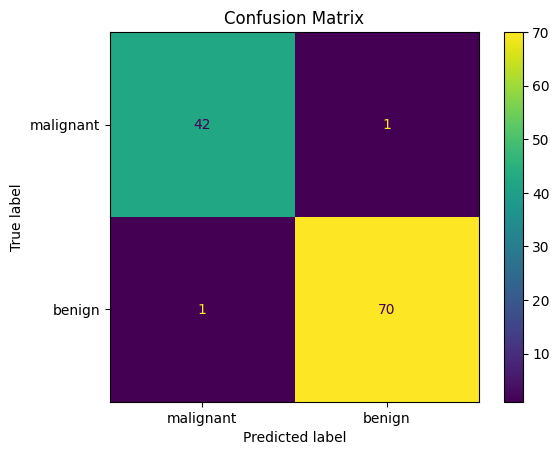

In [10]:
import matplotlib.pyplot as plt

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names).plot()
plt.title("Confusion Matrix")
plt.show()
